# Titanic dataset, Logistic Regression & KNN for ROC & AUC.
what are the notions that will be covered here:
- Data representation and data cleaning
- Dummy variables
- Normalization
- Machine learning models: LogisitcRegression and KNeighborsClassifier
- Tuning of the models with the hyperparameters
- GridSearchCV for hyperparameter tuning
- Prediction and confusion matrix
- ROC and AUC curves
## Import the relevant librarires

In [32]:
import numpy as np
import pandas as pd
import statsmodels.api as sn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the dataset

In [33]:
raw_data = sns.load_dataset('titanic')

In [41]:
raw_data.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visual presentation of the dataset

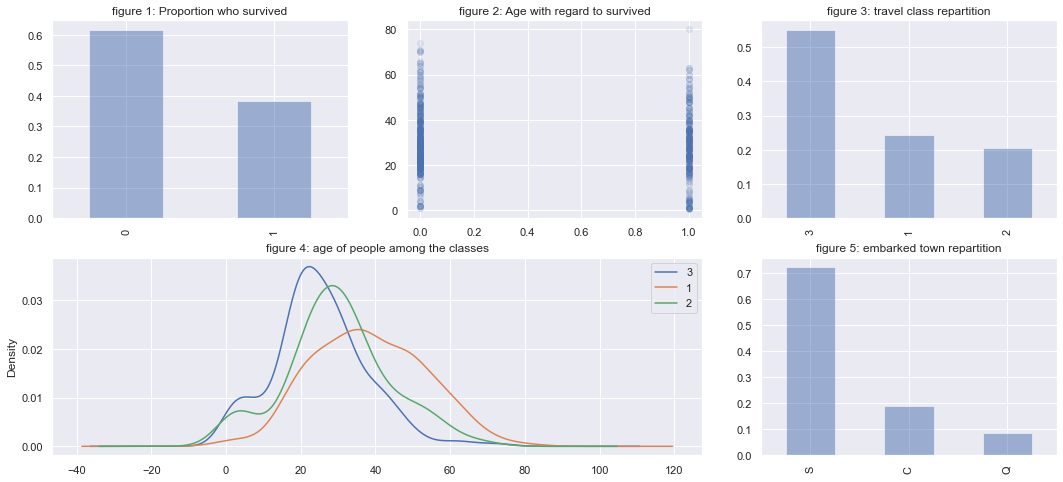

In [46]:
fig = plt.figure(figsize = (18,8))

plt.subplot2grid((2,3), (0,0))
raw_data['survived'].value_counts(normalize=True).plot(kind='bar', alpha = 0.5)
plt.title('figure 1: Proportion who survived')

plt.subplot2grid((2,3),(0,1))
plt.scatter(raw_data['survived'], raw_data['age'], alpha = 0.1)
plt.title('figure 2: Age with regard to survived')

plt.subplot2grid((2,3), (0,2))
raw_data['pclass'].value_counts(normalize=True).plot(kind='bar', alpha = 0.5)
plt.title('figure 3: travel class repartition')

plt.subplot2grid((2,3), (1,0), colspan = 2)
for x in raw_data['pclass'].unique():
    raw_data['age'].loc[raw_data['pclass'] == x].plot(kind='kde') # Kernel Density Estimation
plt.title("figure 4: age of people among the classes")
plt.legend(raw_data.pclass.unique())

plt.subplot2grid((2,3), (1,2))
raw_data['embarked'].value_counts(normalize=True).plot(kind='bar', alpha = 0.5)
plt.title('figure 5: embarked town repartition')

plt.show()

Figures:
- figure 1: Represents the proportion of people who survived.
- figure 2: Represents the age of people who survived.
- figure 3: Represents the proportion of people in the three different classes.
- figure 4: Represents the kernel density estimation of the age of people within the different classes.
- figure 5: Represents the proportion of where people embarked.

What we can say from these graphs:
- Less than 40% of people died.
- Looks like the large majority of people who died were between 20 and 50 years old and that more children survived.
- A large majority of people were in the third class and that the older people were, the more likely they were in an expensive class. The mean of the age of people in the third class is lower than the mean of people in the first one.
- Most people embarked from Southampton.

It's hard to predict anything from these graphs, let's take a closer look at the repartition of people who survived given their sex.

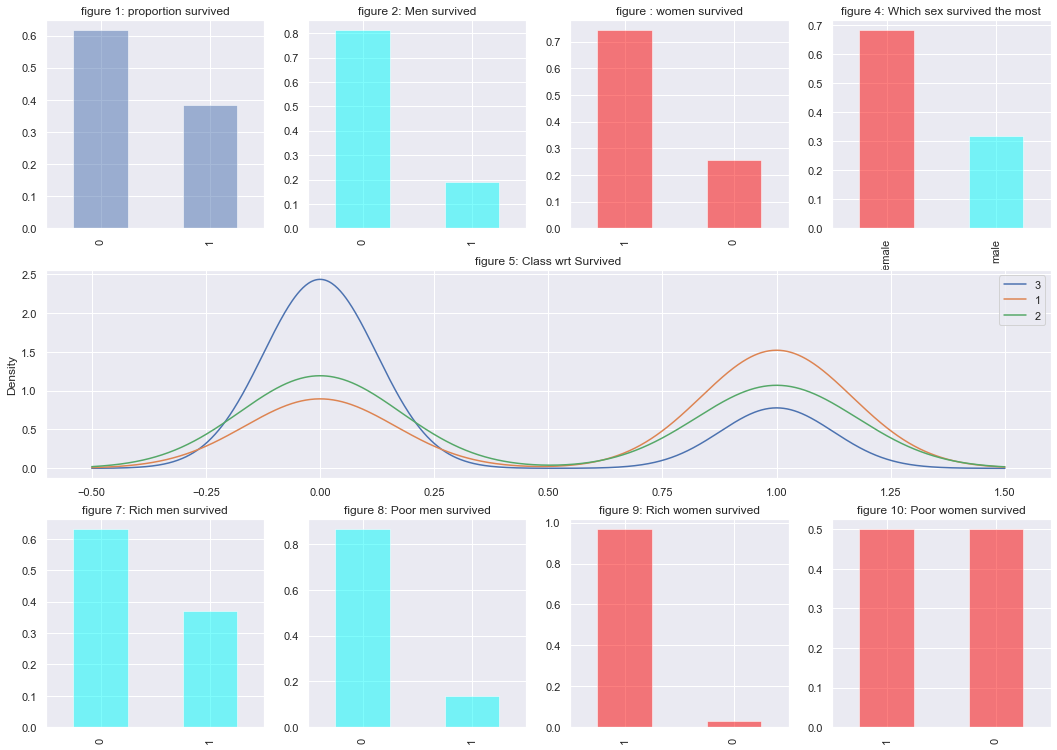

In [51]:
fig = plt.figure(figsize=(18,13))
female_color = "#FA0000"
male_color = "#00FAFA"
sex_color = "#FA7D00"

plt.subplot2grid((3,4),(0,0))
raw_data['survived'].value_counts(normalize=True).plot(kind='bar', alpha = 0.5)
plt.title('figure 1: proportion survived')

plt.subplot2grid((3,4),(0,1))
raw_data['survived'].loc[raw_data['sex'] == 'male'].value_counts(normalize = True).plot(kind = 'bar' ,alpha = 0.5, color = male_color)
plt.title('figure 2: Men survived')

plt.subplot2grid((3,4),(0,2))
raw_data['survived'].loc[raw_data['sex'] == 'female'].value_counts(normalize = True).plot(kind = 'bar', alpha = 0.5, color = female_color)
plt.title('figure : women survived')

plt.subplot2grid((3,4),(0,3))
raw_data['sex'].loc[raw_data['survived'] == 1].value_counts(normalize = True).plot(kind = 'bar', alpha = 0.5, color = [female_color, male_color])
plt.title('figure 4: Which sex survived the most')

plt.subplot2grid((3,4),(1,0), colspan = 4)
for x in raw_data['pclass'].unique():
    raw_data['survived'].loc[raw_data['pclass'] == x].plot(kind='kde') # Kernel Density Estimation
plt.title("figure 5: Class wrt Survived")
plt.legend(raw_data['pclass'].unique())

plt.subplot2grid((3,4),(2,0))
raw_data['survived'].loc[raw_data['sex'] == 'male'].value_counts(normalize = True).plot(kind = 'bar' ,alpha = 0.5, color = male_color)
plt.title('figure 6: Men survived')

plt.subplot2grid((3,4),(2,0))
raw_data['survived'].loc[(raw_data['sex'] == 'male') & (raw_data['pclass'] == 1)].value_counts(normalize = True).plot(kind = 'bar' ,alpha = 0.5, color = male_color)
plt.title('figure 7: Rich men survived')

plt.subplot2grid((3,4),(2,1))
raw_data['survived'].loc[(raw_data['sex'] == 'male') & (raw_data['pclass'] == 3)].value_counts(normalize = True).plot(kind = 'bar' ,alpha = 0.5, color = male_color)
plt.title('figure 8: Poor men survived')

plt.subplot2grid((3,4),(2,2))
raw_data['survived'].loc[(raw_data['sex'] == 'female') & (raw_data['pclass'] == 1)].value_counts(normalize = True).plot(kind = 'bar' ,alpha = 0.5, color = female_color)
plt.title('figure 9: Rich women survived')

plt.subplot2grid((3,4),(2,3))
raw_data['survived'].loc[(raw_data['sex'] == 'female') & (raw_data['pclass'] == 3)].value_counts(normalize = True).plot(kind = 'bar' ,alpha = 0.5, color = female_color)
plt.title('figure 10: Poor women survived')

plt.show()

what we can say from those graphs:
- from figure 1 to 4: we can see that even if only 40% of people survived, with the data given in this dataset, most of people who died were men (more than 80%). We can see that, around 70% of people who survived were women.
- from the figure 5: Looks like most of people who died were from the third class and most of people who survived were from class 1.
- from the figure 7 to 10: it well illustrates the movie titanic. A rich woman have a high survival rate while a poor man have a low survival rate.

All of these graphs indicates some of the paramount features we need to consider for our classification models:
- age
- sex
- pclass

Text(0.5, 1.0, 'survived with regard to age and sex')

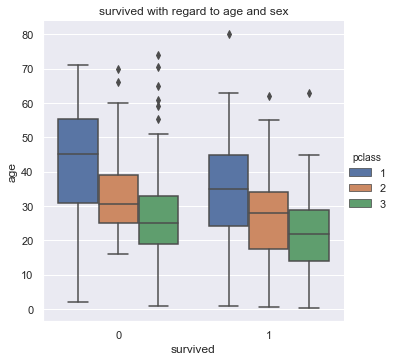

In [59]:
sns.catplot(x = 'survived', y = 'age', hue='pclass', kind='box', data = raw_data)
plt.title('survived with regard to age and sex')

Just one last graph from seaborn that shows a lot of information we already seen later. We could have more explored this dataset but it is not the goal of this notebook. Let's get into practice now !

## Data cleaning
As we seen it before, we first need to clean the dataset in order to have the maximum amount of data to train our models with. what is done next:
- There are missing values inside the "fare" and "age" column. We will fill them with the median value of "fare" and "age". we could have remove the rows with missing values, but this would have removed a lot of data from the dataset.
- Some data are categorical. We need to turn them into numerical. This will be done for the "sex" feature and the "embarked" feature will be turned into dummies.
- We then need to drop some features we don't want in our model.

In [4]:
def clean_data(data):
    data["fare"] = data['fare'].fillna(data["fare"].dropna().median()) # remplace toutes les cases vides de "Fare" avec la valeur moyenne de cette colonne
    data["age"] = data['age'].fillna(data["age"].dropna().median())
    
    data.loc[data['sex'] == 'male', 'sex'] = 0 #On remplace 'male' par '0' dans la colonne 'sex'
    data.loc[data['sex'] == 'female', 'sex'] = 1
    
    data['embarked'] = data['embarked'].fillna('S')
    a = pd.get_dummies(data['embarked'], prefix="embarked")
    frames = [data, a]
    data = pd.concat(frames, axis = 1)
    data = data.drop(['embark_town','embarked','who','class','who','adult_male','deck','alive','alone'], axis  = 1)
    
    return(data)

data_cleaned = clean_data(raw_data)
data_cleaned.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
count,891.000000,891.000000,891.0,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
unique,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,577.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,29.361582,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028
std,0.486592,0.836071,NaN,13.019697,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000


In [60]:
data_cleaned.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


Here is the head of the clean dataset we are goind to use. Now we need to select the features and targets.

## Select the features

In [61]:
target = data_cleaned['survived']
features = data_cleaned.drop('survived', axis = 1)

In [62]:
print(target.shape)
print(features.shape)

(891,)
(891, 9)


Here we have to be careful using these target and data, they don't have the same kind of shape. At some point, it might be needed to reshape them, to turn them into numpy array.

# Logistic Regression

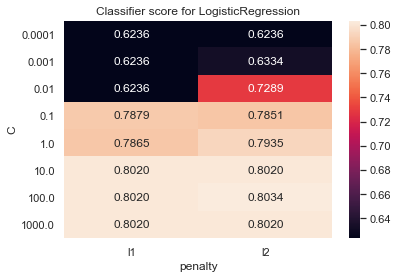

In [64]:
# Import the relevant libraries
#_______________________________________________#
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Declare the variables
#_______________________________________________#
X_not_scaled = features
y = target

# Preprocess the data
#_______________________________________________#
scaler = MinMaxScaler() # We create a scaler object here, we now need to fit it to the data and then transform the data...
X_scaled = scaler.fit_transform(X_not_scaled) # this is done in one line with the "fit_transform" command.

# Split the data
#_______________________________________________#
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=42) # In order to, later, evaluate our model, we need to split the data into two:
# ...One train_set on which we are going to train our models
# ...One test_set on which we are goind to test it's accuracy and capacity of prediction
# Here we will have 80% of the initial data in the train_set, and 20% in the test_set.
cv = KFold(4, random_state = 42, shuffle = True) # We will also use a cross_validation method to train our data more efficiently

# Choose the useful hyperparameters
#_______________________________________________#

log_cols = ["C", "penalty", "cross_val_score"] #We will here explore some of the hyperparameters of the LogisitcRegression: C and Penalty
log = pd.DataFrame(columns=log_cols) # We will store everything in a dataset called "log" to represents the score of the model given the two chosen hyperparameters

penalty = ['l1', 'l2'] # Here is the two values we will explore for the hyperparameter "penalty"
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] # Here is the values we will explore for the hyperparameter "C"

Score_Hyperparameters = {
      'C' : [] ,
      'penalty' : [] ,
      'cross_val_score': []
      } # It's gonna be useful to build a dictionnary we are goind to fill in the for loop. This is gonna be easy to turn it into a dataframe once completely filled



for c in C:
    for p in penalty:
        Score_Hyperparameters['C'].append(c)
        Score_Hyperparameters['penalty'].append(p)
        score = cross_val_score(LogisticRegression(C=c, penalty=p, solver='liblinear'), X_train, y_train, cv=cv).mean() # Here we train a LogisticRegression model with the X_train and y_trainand also use a cross_validation method, hence the ".mean()" to calculate the mean of the scores obtained with each cros_validation
        Score_Hyperparameters['cross_val_score'].append(score)

df = pd.DataFrame(Score_Hyperparameters) # Here we turn the dictionnary into a dataframe. This is useful to represent the data with a heatmap (thanks to seaborn)

# Show the score
#_______________________________________________#
plt.figure()

plt.xlabel('cross_val_score')
plt.title('Classifier score for LogisticRegression')

heatmap_data = df.pivot("C", "penalty", "cross_val_score")
ax = sns.heatmap(heatmap_data, annot=True, fmt='.4f')

Given the previous heatmap, we can say that the best values for the hyperparameters are 100 for "C" with a l2 norm. Let's build a LogisticRegression model with these parameters and evaluates it with the test_set.

In [65]:
model_LR = LogisticRegression(C=100, penalty='l2', solver='liblinear') # Here is the model of LogisticRegression with the chosen hyperparameters
model_LR.fit(X_train,y_train) # We first need to train the model on the train_set
model_LR.score(X_test,y_test) # And then we can evaluate it on data it never seen.

0.8100558659217877

Looks like we obtain a 81% accuracy in predicting the fate of passenger. Not bad, but there was an easier way to tune the previous hyperparameters. It's to use the GridSearchCV from the model_selection package, let's use it !

In [69]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]) , 'penalty': ['l1','l2']} # We build a dictionnary that store as keys the hyperparameters and as values the values we want for he hyperparameter
grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv = 4) # Then we build the grid, fill it with the model, the previous dictionnary and the level of cross validation
grid.fit(X_train, y_train) # We now can fit the grid on the train_set

GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [70]:
print(grid.best_score_, grid.best_params_) # We can acces the best score obtained with the grid and the corresponding parameters with these command lines

0.8019662921348315 {'C': 10.0, 'penalty': 'l2'}


Looks like the hyperparameters we obtain with the grid are a bit different from the previous one, let's evaluate the new score by creating a new LogisticRegression model.

In [10]:
params = grid.best_params_
best_model_LR = LogisticRegression(C = params['C'], penalty = params['penalty'])
results_log = best_model_LR.fit(X_train, y_train)
results_log.score(X_test, y_test)

0.7988826815642458

We ultimately obtain a score of approximately 80% with the GridSearchCV method. It's a bit lower than the previous model but it is way easier to implement.

### LogisticRegression: Confusion Matrix
At this point, it might be useful to go deeper in the evaluation of our model. To do so, we will build a confusion matrix that will indicates were the model predicted right or wrong.

In [11]:
from sklearn.metrics import confusion_matrix
y_true = np.array(y_test) #These are the true values from the initial dataset
y_pred = results_log.predict(X_test) #These are the predicted values (by the model)
matrix = confusion_matrix(y_true, y_pred) # Here we build the confusion matrix...
cm_df = pd.DataFrame(matrix) #...and store it into a dataframe (easier to represent)
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,89,16
Actual 1,20,54


Let's now analyse it:

In [12]:
unique, counts = np.unique(y_true, return_counts=True)
total = dict(zip(unique, counts))

True_positive = cm_df.iloc[1,1]
True_negative = cm_df.iloc[0,0]
False_positive = cm_df.iloc[0,1]
False_negative = cm_df.iloc[1,0]


print('True positive is : ' +str(True_positive) + " out of the "+ str(total[1]) + " who survived were correctly identified")
print('True negative is : ' +str(True_negative) + " out of the "+ str(total[0]) + " who died were correctly identified")
print('False negative is : ' +str(False_positive) + " out of the "+ str(total[1]) + "  who survived were incorrectly identified to be dead")
print('False positive is : ' +str(False_negative) + " out of the "+ str(total[0]) + " who died but were incorrectly identified to be alive")

True positive is : 54 out of the 74 who survived were correctly identified
True negative is : 89 out of the 105 who died were correctly identified
False negative is : 16 out of the 74  who survived were incorrectly identified to be dead
False positive is : 20 out of the 105 who died but were incorrectly identified to be alive


In [13]:
sensitivity = True_positive / (True_positive + False_negative)
specificity = True_negative / (False_positive + True_negative)
False_positive_rate = False_positive / (False_positive + True_negative)
print('sensitivity = ' + str(sensitivity))
print('specificity = ' + str(specificity))
print('False_positive_rate = ' + str(False_positive_rate))

sensitivity = 0.7297297297297297
specificity = 0.8476190476190476
False_positive_rate = 0.1523809523809524


Here are some metrics that help us evaluate our model. But there are other things we could have tuned than the previous hyperparameters. In the LogisticRegression model, targets are predicted given a sigmoid function. The threshold is 0.5 by default (if the probability calculated by the model given some featues is higher than 0.5, the model will assign "1" as survived, "0" if the probability is below 0.5) But we could have changed the threshold ! The ROC curve will explore what we could have expected for each thresholds from 1 to 0.As a result, it is possible to choose the threshold that match our expectations (if we want to maximize the True_positive_rate or want a balanced result etc...)

The AUC while be the area below the curve. It will help us to determine which model is better. (the better the AUC, the better the model).

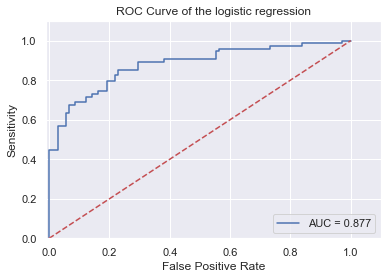

In [14]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_scores = results_log.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('Sensitivity')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of the logistic regression')
plt.show()

What we can say from this curve is that for each "step" the more the a threshold is on the left, the more efficient it is. We then have to choose on witch spet we want to be.

# KNN Classifier

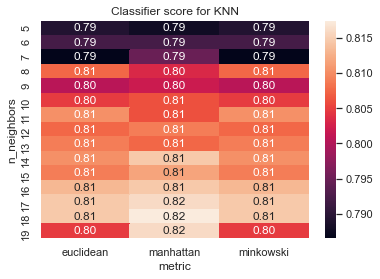

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X_not_scaled = features
y = target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_not_scaled) #X est maintenant un tableau np normalisé, l'avantage de MinMaxScaler c'est que ca ne touche pas les dummy

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=42)

cv = KFold(4, random_state = 42, shuffle = True) #
model_KNN = KNeighborsClassifier()

log_cols = ["n_neighbors", "metric", "cross_val_score"]
log = pd.DataFrame(columns=log_cols)

metric = ['minkowski','manhattan','euclidean']
n_neighbors = np.arange(5,20,1)

dic = {
    'n_neighbors' : [] ,
      'metric' : [] ,
      'cross_val_score': []
      }

for n in n_neighbors:
    for m in metric:
        dic['n_neighbors'].append(n)
        dic['metric'].append(m)
        score = cross_val_score(KNeighborsClassifier(n_neighbors=n, metric = m), X_train, y_train, cv=cv).mean()
        dic['cross_val_score'].append(score)

df = pd.DataFrame(dic)

plt.figure()

plt.xlabel('cross_val_score')
plt.title('Classifier score for KNN')

heatmap_data = df.pivot("n_neighbors", "metric", "cross_val_score")
ax = sns.heatmap(heatmap_data, annot=True, fmt='.2f')

In [16]:
model_KNN = KNeighborsClassifier(n_neighbors = 18, metric = 'manhattan')
model_KNN.fit(X_train,y_train)
model_KNN.score(X_test,y_test)

0.7932960893854749

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = {'n_neighbors' : np.arange(1,20), 'metric': ['minkowski','manhattan','euclidean']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [19]:
grid.best_score_

0.8160051216389246

In [20]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 16}

In [21]:
params = grid.best_params_
best_model_KNN = KNeighborsClassifier(n_neighbors = params['n_neighbors'], metric = params['metric'])
results_log = best_model_KNN.fit(X_train, y_train)
results_log.score(X_test, y_test)

0.7988826815642458

In [22]:
from sklearn.metrics import confusion_matrix
y_true = np.array(y_test)
y_pred = results_log.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)
print(matrix)

[[95 10]
 [26 48]]


In [23]:
cm_df = pd.DataFrame(matrix)
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,95,10
Actual 1,26,48


In [24]:
True_positive = cm_df.iloc[1,1]
True_negative = cm_df.iloc[0,0]
False_positive = cm_df.iloc[0,1]
False_negative = cm_df.iloc[1,0]


print('True positive is : ' +str(True_positive) + " People who survived correctly identified")
print('True negative is : ' +str(True_negative) + " People who died correctly identified")
print('False negative is : ' +str(False_positive) + " People who survived but incorrectly identified to dead")
print('False positive is : ' +str(False_negative) + " People who actually died but incorrectly identified to alive")

True positive is : 48 People who survived correctly identified
True negative is : 95 People who died correctly identified
False negative is : 10 People who survived but incorrectly identified to dead
False positive is : 26 People who actually died but incorrectly identified to alive


In [25]:
unique, counts = np.unique(y_true, return_counts=True)
dict(zip(unique, counts))

{0: 105, 1: 74}

In [26]:
sensitivity = True_positive / (True_positive + False_negative)
specificity = True_negative / (False_positive + True_negative)
False_positive_rate = False_positive / (False_positive + True_negative)
print('sensitivity = ' + str(sensitivity))
print('specificity = ' + str(specificity))
print('False_positive_rate = ' + str(False_positive_rate))

sensitivity = 0.6486486486486487
specificity = 0.9047619047619048
False_positive_rate = 0.09523809523809523


In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_scores = results_log.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

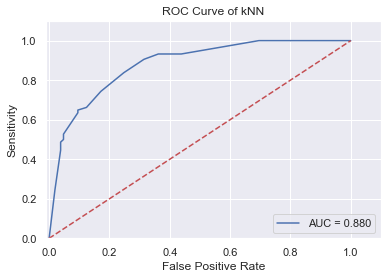

In [28]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('Sensitivity')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()